In [1]:
import sys
sys.path.append("..")
import numpy as np
from tqdm.notebook import tqdm
from mango.mango import Mango
import torch
from mango.agents.agents import Agent
from mango.environments import frozen_lake
from mango.utils import plot_agent_loss_reward

In [2]:
size = 12
p = 0.5
gamma = 0.8

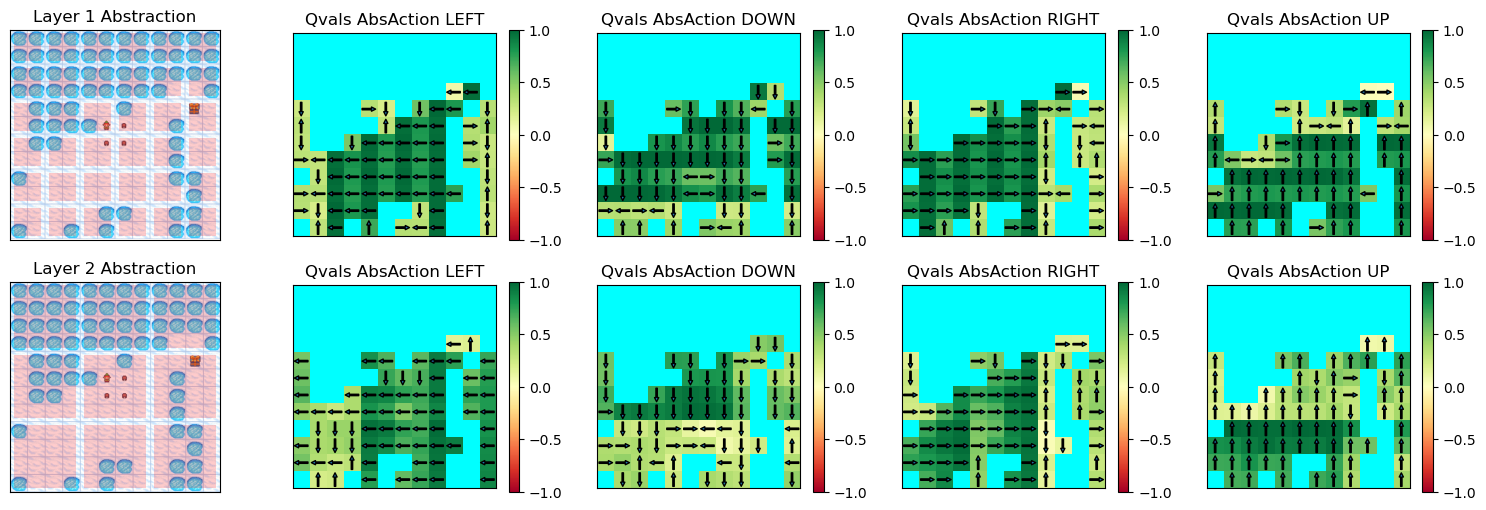

In [7]:
mango = Mango.load_from(f"trained_models/frozen_lake/map={size}x{size}_p={int(p*100)}%/mango.pickle")
frozen_lake.plot_all_qvals(mango)

In [8]:
agent = Agent(
    mango = mango.environment,
    policy_params=dict(
        lr=1e-3, gamma=0.99,
        net_params=dict(
            hidden_channels=[4, 4, 4, 4], hidden_features=[], batch_norm=False,
            #activation_out=torch.nn.Tanh(),
            #device=torch.device("cuda") if torch.cuda.is_available() else None,
        ),
    ),
)

In [9]:
N = 100000
randomness = np.linspace(1.0, 0.0, N)**2
for r in (pbar := tqdm(randomness)):
    pbar.set_description(f"randomness: {r:.3f}")
    obs, reward, term, trunc, info = agent.explore(episode_length=size**2, randomness=r)
    agent.train()
agent.save_to(f"trained_models/frozen_lake/map={size}x{size}_p={int(p*100)}%/mangoagent.pickle")

  0%|          | 0/100000 [00:00<?, ?it/s]

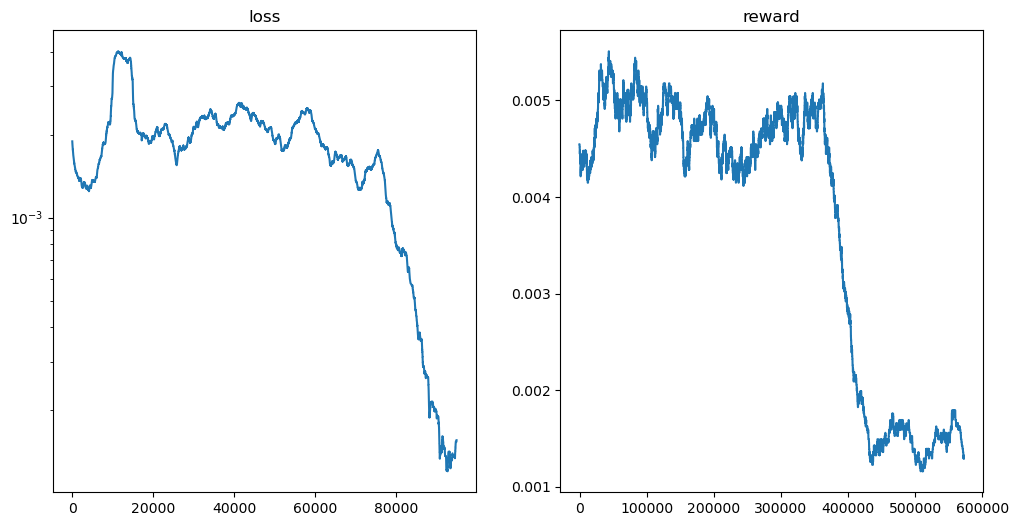

In [ ]:
plot_agent_loss_reward(agent)